In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/soldv/python data/Home Credit')

data1 = '/content/drive/MyDrive/soldv/python data/Home Credit/credit_card_balance.csv'

In [4]:
df = pd.read_csv(data1)

In [6]:
df.drop(['SK_ID_PREV', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.drop(df.columns.difference(['AMT_BALANCE', 'AMT_DRAWINGS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_RECEIVABLE_PRINCIPAL', 
                               'NAME_CONTRACT_STATUS', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_CREDIT_LIMIT_ACTUAL']), 1, inplace=True)

<ipython-input-6-ef050893b46c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['AMT_BALANCE', 'AMT_DRAWINGS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_RECEIVABLE_PRINCIPAL',


In [7]:
df['NAME_CONTRACT_STATUS'].value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [73]:
# df = pd.get_dummies(df, columns=['NAME_CONTRACT_STATUS'])

In [8]:
df.head(10)

,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,NAME_CONTRACT_STATUS
0,56.970,135000,877.500,1700.325,0.000,Active
1,63975.555,45000,2250.000,2250.000,60175.080,Active
2,31815.225,450000,0.000,2250.000,26926.425,Active
3,236572.110,225000,2250.000,11795.760,224949.285,Active
4,453919.455,450000,11547.000,22924.890,443044.395,Active
5,82903.815,270000,0.000,4449.105,80519.040,Active
6,353451.645,585000,67500.000,14684.175,345433.860,Active
7,47962.125,45000,45000.000,0.000,44735.310,Active
8,291543.075,292500,289339.425,130.500,285376.410,Active
9,201261.195,225000,111026.700,6338.340,192793.275,Active


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 6 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   AMT_BALANCE               float64
 1   AMT_CREDIT_LIMIT_ACTUAL   int64  
 2   AMT_DRAWINGS_CURRENT      float64
 3   AMT_INST_MIN_REGULARITY   float64
 4   AMT_RECEIVABLE_PRINCIPAL  float64
 5   NAME_CONTRACT_STATUS      object 
dtypes: float64(4), int64(1), object(1)
memory usage: 175.8+ MB


In [10]:
df.shape

(3840312, 6)

In [11]:
df.describe(include='all')

,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,NAME_CONTRACT_STATUS
count,3.840312e+06,3.840312e+06,3.840312e+06,3.535076e+06,3.840312e+06,3840312
unique,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,Active
freq,NaN,NaN,NaN,NaN,NaN,3698436
mean,5.830016e+04,1.538080e+05,7.433388e+03,3.540204e+03,5.596588e+04,NaN
std,1.063070e+05,1.651457e+05,3.384608e+04,5.600154e+03,1.025336e+05,NaN
min,-4.202502e+05,0.000000e+00,-6.211620e+03,0.000000e+00,-4.233058e+05,NaN
25%,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,8.904669e+04,1.800000e+05,0.000000e+00,6.633911e+03,8.535924e+04,NaN


In [13]:
missing_data = df.isnull()

# menghitung missing values per kolom dengan for
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("") 

AMT_BALANCE
False    3840312
Name: AMT_BALANCE, dtype: int64

AMT_CREDIT_LIMIT_ACTUAL
False    3840312
Name: AMT_CREDIT_LIMIT_ACTUAL, dtype: int64

AMT_DRAWINGS_CURRENT
False    3840312
Name: AMT_DRAWINGS_CURRENT, dtype: int64

AMT_INST_MIN_REGULARITY
False    3535076
True      305236
Name: AMT_INST_MIN_REGULARITY, dtype: int64

AMT_RECEIVABLE_PRINCIPAL
False    3840312
Name: AMT_RECEIVABLE_PRINCIPAL, dtype: int64

NAME_CONTRACT_STATUS
False    3840312
Name: NAME_CONTRACT_STATUS, dtype: int64



**Null value at** :AMT_DRAWINGS_ATM_CURRENT,
AMT_DRAWINGS_OTHER_CURRENT,
AMT_DRAWINGS_POS_CURRENT,
AMT_INST_MIN_REGULARITY,
AMT_PAYMENT_CURRENT,
CNT_DRAWINGS_ATM_CURRENT,
CNT_DRAWINGS_OTHER_CURRENT,
CNT_DRAWINGS_POS_CURRENT,
CNT_INSTALMENT_MATURE_CUM

In [14]:
mean_AMT_INST_MIN_REGULARITY = df["AMT_INST_MIN_REGULARITY"].mean(axis=0)

df["AMT_INST_MIN_REGULARITY"].replace(np.nan, mean_AMT_INST_MIN_REGULARITY, inplace=True)

no null values, 

In [15]:
df.duplicated().sum()

2204578

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled
cols_to_scale = ['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_RECEIVABLE_PRINCIPAL']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# df['hero_damage'] = (df['hero_damage']-df['hero_damage'].min())/(df['hero_damage'].max()-df['hero_damage'].min())
# AMT_DRAWINGS_ATM_CURRENT 	AMT_DRAWINGS_CURRENT

<Axes: xlabel='AMT_CREDIT_LIMIT_ACTUAL', ylabel='AMT_BALANCE'>

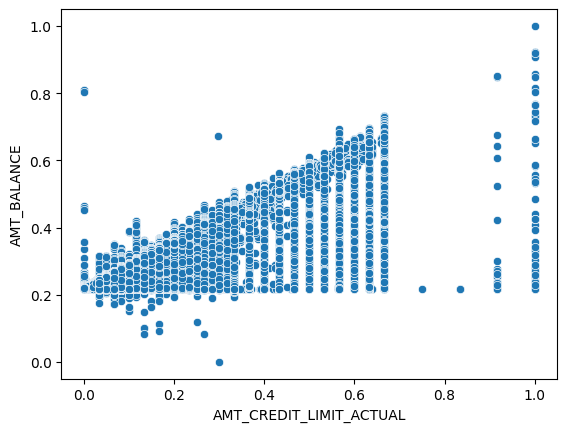

In [18]:
# Scatter plot of credit limit vs. balance
sns.scatterplot(x='AMT_CREDIT_LIMIT_ACTUAL', y='AMT_BALANCE', data=df)

<Axes: xlabel='AMT_CREDIT_LIMIT_ACTUAL', ylabel='Count'>

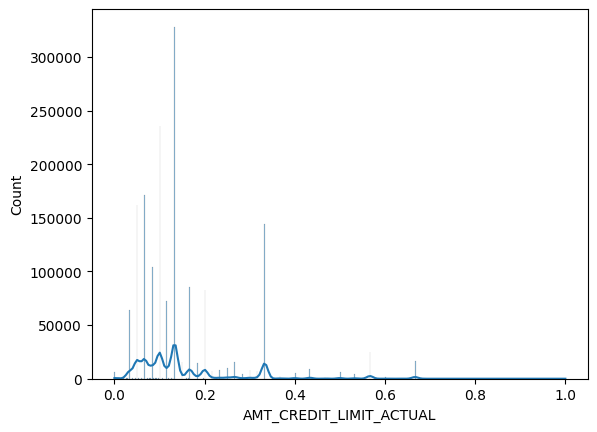

In [19]:
# Histogram of credit limit distribution
sns.histplot(df['AMT_CREDIT_LIMIT_ACTUAL'], kde=True)

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_CREDIT_LIMIT_ACTUAL'>

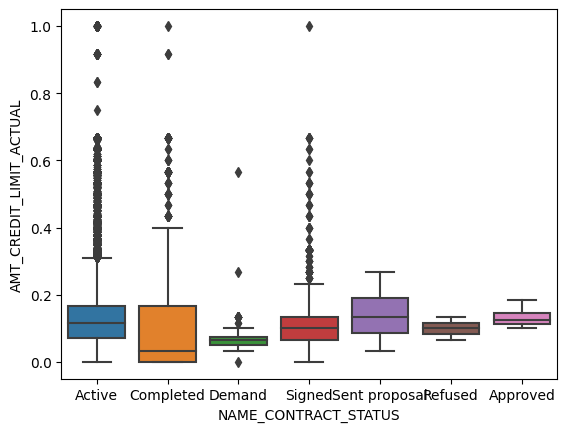

In [20]:
# Box plot of credit limit vs. contract status
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT_LIMIT_ACTUAL', data=df)

In [21]:
# Create a new feature that calculates the ratio of balance to credit limit
df['BALANCE_CREDIT_RATIO'] = df['AMT_BALANCE'] / df['AMT_CREDIT_LIMIT_ACTUAL']

# Create a new feature that calculates the difference between receivable principal and balance
df['RECEIVABLE_PRINCIPAL_DIFF'] = df['AMT_RECEIVABLE_PRINCIPAL'] - df['AMT_BALANCE']

In [38]:
df.dropna(inplace=True)

In [29]:
df.head()

,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,NAME_CONTRACT_STATUS,BALANCE_CREDIT_RATIO,RECEIVABLE_PRINCIPAL_DIFF
0,0.218211,0.100000,0.003091,0.008381,0.223307,Active,2.182108,0.005096
1,0.251395,0.033333,0.003690,0.011090,0.255051,Active,7.541860,0.003656
2,0.234699,0.333333,0.002709,0.011090,0.237512,Active,0.704096,0.002813
3,0.341002,0.166667,0.003690,0.058141,0.341975,Active,2.046014,0.000973
4,0.453842,0.333333,0.007744,0.112996,0.457027,Active,1.361527,0.003184


In [42]:
df.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True) # replaces inf and -inf values with the maximum float value
print(np.isinf(df.values))

TypeError: ignored

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df[['AMT_BALANCE', 'AMT_DRAWINGS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_RECEIVABLE_PRINCIPAL', 'BALANCE_CREDIT_RATIO', 'RECEIVABLE_PRINCIPAL_DIFF']]
y = df['AMT_CREDIT_LIMIT_ACTUAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict credit limits for the test data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
 

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


ValueError: ignored

lmao

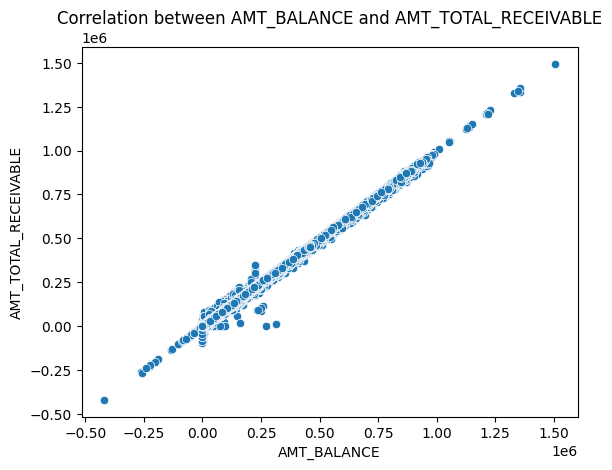

In [89]:
# Create a scatter plot of AMT_BALANCE vs. AMT_TOTAL_RECEIVABLE
sns.scatterplot(data=df, x='AMT_BALANCE', y='AMT_TOTAL_RECEIVABLE')

# Add labels and title
plt.xlabel('AMT_BALANCE')
plt.ylabel('AMT_TOTAL_RECEIVABLE')
plt.title('Correlation between AMT_BALANCE and AMT_TOTAL_RECEIVABLE')
plt.show()

In [90]:
print(df.isna().sum())

SK_ID_CURR                            0
AMT_BALANCE                           0
AMT_CREDIT_LIMIT_ACTUAL               0
AMT_DRAWINGS_ATM_CURRENT              0
AMT_DRAWINGS_CURRENT                  0
AMT_DRAWINGS_OTHER_CURRENT            0
AMT_DRAWINGS_POS_CURRENT              0
AMT_INST_MIN_REGULARITY               0
AMT_PAYMENT_CURRENT                   0
AMT_PAYMENT_TOTAL_CURRENT             0
AMT_RECEIVABLE_PRINCIPAL              0
AMT_RECIVABLE                         0
AMT_TOTAL_RECEIVABLE                  0
CNT_DRAWINGS_ATM_CURRENT              0
CNT_DRAWINGS_CURRENT                  0
CNT_DRAWINGS_OTHER_CURRENT            0
CNT_DRAWINGS_POS_CURRENT              0
CNT_INSTALMENT_MATURE_CUM             0
SK_DPD                                0
SK_DPD_DEF                            0
NAME_CONTRACT_STATUS_Active           0
NAME_CONTRACT_STATUS_Approved         0
NAME_CONTRACT_STATUS_Completed        0
NAME_CONTRACT_STATUS_Demand           0
NAME_CONTRACT_STATUS_Refused          0


In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop('NAME_CONTRACT_STATUS_Active', axis=1)
y = df['NAME_CONTRACT_STATUS_Active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a scaler object
scaler = StandardScaler()

# fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# create a logistic regression model
model = LogisticRegression(random_state=42)

# fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion matrix:
 [[  5435      0]
 [     0 389077]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00    389077

    accuracy                           1.00    394512
   macro avg       1.00      1.00      1.00    394512
weighted avg       1.00      1.00      1.00    394512



unseen model

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X = df.drop('NAME_CONTRACT_STATUS_Active', axis=1)
y = df['NAME_CONTRACT_STATUS_Active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification Report:", classification_report)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9863603641967799
Confusion Matrix: [[   117   5318]
 [    63 389014]]
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.02      0.04      5435
           1       0.99      1.00      0.99    389077

    accuracy                           0.99    394512
   macro avg       0.82      0.51      0.52    394512
weighted avg       0.98      0.99      0.98    394512



In [62]:
# Train a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [63]:
from sklearn.feature_selection import RFE

# create an RFE object to select top 10 features
rfe = RFE(model, n_features_to_select=10, verbose=1)

# fit the RFE object to the scaled training data
rfe.fit(X_train_scaled, y_train)

# get the top 10 selected feature names
selected_features = X_train.columns[rfe.support_]

# subset the scaled training and testing data to the selected features only
X_train_scaled_selected = X_train_scaled[:, rfe.support_]
X_test_scaled_selected = X_test_scaled[:, rfe.support_]

# fit a logistic regression model to the selected features only
model_selected = LogisticRegression(random_state=42)
model_selected.fit(X_train_scaled_selected, y_train)

# make predictions on the scaled testing data using the selected features model
y_pred_selected = model_selected.predict(X_test_scaled_selected)

# evaluate the simplified model performance
print('Accuracy:', accuracy_score(y_test, y_pred_selected))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_selected))
print('Classification report:\n', classification_report(y_test, y_pred_selected))

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Accuracy: 0.9999847913371457
Confusion matrix:
 [[  5429      6]
 [     0 389077]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00    389077

    accuracy                           1.00    394512
   macro avg       1.00      1.00      1.00    394512
weighted avg       1.00      1.00      1.00  

In [64]:
# Create new features
df['credit_limit_balance_ratio'] = df['AMT_CREDIT_LIMIT_ACTUAL'] / df['AMT_BALANCE']
df['drawing_limit_ratio'] = (df['AMT_DRAWINGS_ATM_CURRENT'] + df['AMT_DRAWINGS_CURRENT'] +
                             df['AMT_DRAWINGS_OTHER_CURRENT'] + df['AMT_DRAWINGS_POS_CURRENT']) / df['AMT_CREDIT_LIMIT_ACTUAL']

# Check the data
print(df.head())

   SK_ID_CURR  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0      378907       56.970                   135000                       0.0   
1      363914    63975.555                    45000                    2250.0   
2      371185    31815.225                   450000                       0.0   
3      337855   236572.110                   225000                    2250.0   
4      126868   453919.455                   450000                       0.0   

   AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                 877.5                         0.0                     877.5   
1                2250.0                         0.0                       0.0   
2                   0.0                         0.0                       0.0   
3                2250.0                         0.0                       0.0   
4               11547.0                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY